## 데이터를 학습하여 개와 고양이 구분 

In [ ]:
import os
import shutil #쉘 유틸

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
# original Date Path
original_dataset_dir = './datasets/train'

# Small Dataset Path
base_dir = './datasets/cats_and_dogs_small'

if os.path.exists(base_dir): #있는지 없는지 체크
    shutil.rmtree(base_dir) #참이면 지움
os.mkdir(base_dir)

In [ ]:
# Train, Validation, Test data
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [ ]:
#file copy

#fnames = []
#for i in range(1000):
#    filename = 'cat.{}.jpg'.format(i)
#    fnames.append(filename)
#print(fnames)

#cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#dog train data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
print('-------------------Test dataset Copy completed')

In [ ]:
#cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#dog validation data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
print('-------------------Validation dataset Copy completed')

-------------------Validation dataset Copy completed


In [ ]:
# cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# dog test data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
print('-------------------Test dataset Copy completed')

-------------------Test dataset Copy completed


In [ ]:
print('Train cat images: ', len(os.listdir(train_cats_dir))) # listdir : 경로에 파일의 개수를 알 수 있음
print('Train dog images: ', len(os.listdir(train_dogs_dir)))
print('Validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Test cat images: ', len(os.listdir(test_cats_dir)))
print('Test dog images: ', len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


In [ ]:
# Build network

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
# Data Preprocessing

#Image scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
                        test_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

In [ ]:
for data_batch, labels_batch in train_generator:
    print('Batch Data Size:', data_batch.shape)
    print('Batch Label Size', labels_batch.shape)
    break

Batch Data Size: (20, 150, 150, 3)
Batch Label Size (20,)


In [ ]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=5,
                             epochs=30,
                             validation_data=test_generator,
                             validation_steps=50)

Epoch 1/30
5/5 [==============================] - 10s 2s/step - loss: 0.1065 - accuracy: 0.9800 - val_loss: 2.6078 - val_accuracy: 0.7280
Epoch 2/30
5/5 [==============================] - 10s 2s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 2.9370 - val_accuracy: 0.7300
Epoch 3/30
5/5 [==============================] - 11s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.0762 - val_accuracy: 0.7260
Epoch 4/30
5/5 [==============================] - 10s 2s/step - loss: 6.0806e-04 - accuracy: 1.0000 - val_loss: 3.1638 - val_accuracy: 0.7370
Epoch 5/30
5/5 [==============================] - 10s 2s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 3.5324 - val_accuracy: 0.7320
Epoch 6/30
5/5 [==============================] - 11s 2s/step - loss: 0.0080 - accuracy: 0.9900 - val_loss: 3.7555 - val_accuracy: 0.7320
Epoch 7/30
5/5 [==============================] - 10s 2s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 3.7835 - val_accuracy: 0.7340
Epoch 8/30
5/5 [==============

In [ ]:
model.save('cats_and_dogs_small_1.0.h5')

Text(0.5, 1.0, 'Training and validation accuracy')

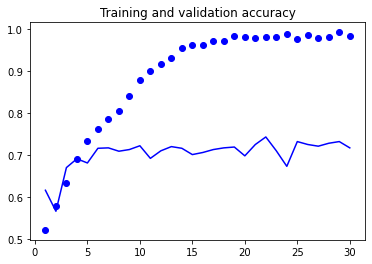

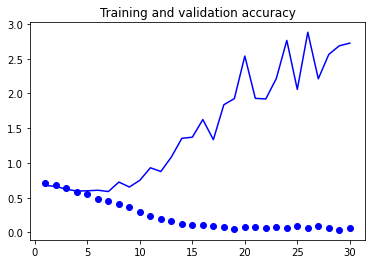

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs,val_loss,'b-',label='Validation accuracy')
plt.title('Training and validation accuracy')

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2, #이미지 기울기
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

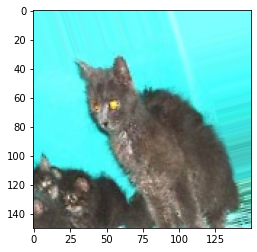

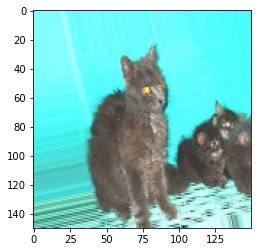

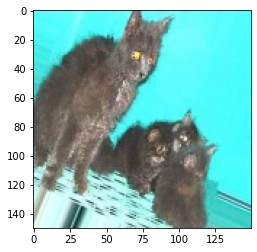

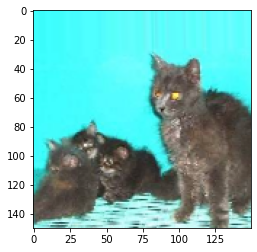

In [ ]:
#이미지 가져오기
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[4]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

In [ ]:
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # 타깃 디렉터리        
    train_dir,        
    # 모든 이미지를 150 × 150 크기로 바꿉니다
    target_size=(150, 150),        
    batch_size=32,       
    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다 
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,        
    target_size=(150, 150),        
    batch_size=32,        
    class_mode='binary')

history = model.fit_generator(      
    train_generator,      
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

SyntaxError: invalid character in identifier (1128364808.py, line 1)